In [6]:
import pandas as pd

df = pd.read_csv('./data_for_exam.csv')
df

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,3/12/2014,Mortgage,Other mortgage,NaN,NaN,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
1,1/19/2017,Student loan,Federal student loan servicing,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No
2,4/6/2018,Credit card or prepaid card,General-purpose credit card or charge card,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,NaN
3,6/8/2014,Credit card,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes
4,9/13/2014,Debt collection,Credit card,NaN,NaN,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
94,2/10/2015,Money transfers,Domestic (US) money transfer,NaN,NaN,MONEYGRAM PAYMENT SYSTEMS WORLDWIDE INC,MI,49022,Web,Closed with monetary relief,Yes,No
95,1/20/2015,Mortgage,Conventional adjustable mortgage (ARM),NaN,NaN,NATIONSTAR MORTGAGE,DE,19901,Web,Closed with explanation,Yes,No
96,8/15/2018,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,NaN,NaN,"CCI Financial, Inc",CA,932XX,Web,Closed with explanation,Yes,NaN
97,1/29/2017,Credit reporting,NaN,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,32003,Web,Closed with non-monetary relief,Yes,No


In [4]:
df.isnull().sum()

Date received                    0
Product                          0
Sub-product                     13
Consumer complaint narrative    83
Company public response         66
Company                          0
State                            1
ZIP code                        10
Submitted via                    0
Company response to consumer     0
Timely response?                 0
Consumer disputed?              24
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 99 non-null     object
 1   Product                       99 non-null     object
 2   Sub-product                   86 non-null     object
 3   Consumer complaint narrative  16 non-null     object
 4   Company public response       33 non-null     object
 5   Company                       99 non-null     object
 6   State                         98 non-null     object
 7   ZIP code                      89 non-null     object
 8   Submitted via                 99 non-null     object
 9   Company response to consumer  99 non-null     object
 10  Timely response?              99 non-null     object
 11  Consumer disputed?            75 non-null     object
dtypes: object(12)
memory usage: 9.4+ KB


In [8]:
from datetime import datetime

# Define the input date format
input_date_format = "%m/%d/%Y"

# Define the desired output date format
output_date_format = "%Y-%m-%d"

# Convert and format the dates
formatted_dates = [datetime.strptime(date, input_date_format).strftime(output_date_format) for date in df['Date received']]

for formatted_date in formatted_dates:
    dates = formatted_date

In [9]:
df['Date received'] = dates

In [20]:
df['State'] = df['State'].dropna()

In [30]:
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].fillna('')
data.loc[:, 'Consumer complaint narrative'] = data['Consumer complaint narrative'].astype(str)


  Date received                      Product  \
0    2014-11-18                     Mortgage   
1    2014-11-18                 Student loan   
2    2014-11-18  Credit card or prepaid card   
3    2014-11-18                  Credit card   
4    2014-11-18              Debt collection   

                                  Sub-product  \
0                              Other mortgage   
1              Federal student loan servicing   
2  General-purpose credit card or charge card   
3                                         NaN   
4                                 Credit card   

                        Consumer complaint narrative Company public response  \
0                                                NaN                     NaN   
1  When my loan was switched over to Navient i wa...                     NaN   
2  I tried to sign up for a spending monitoring p...                     NaN   
3                                                NaN                     NaN   
4               

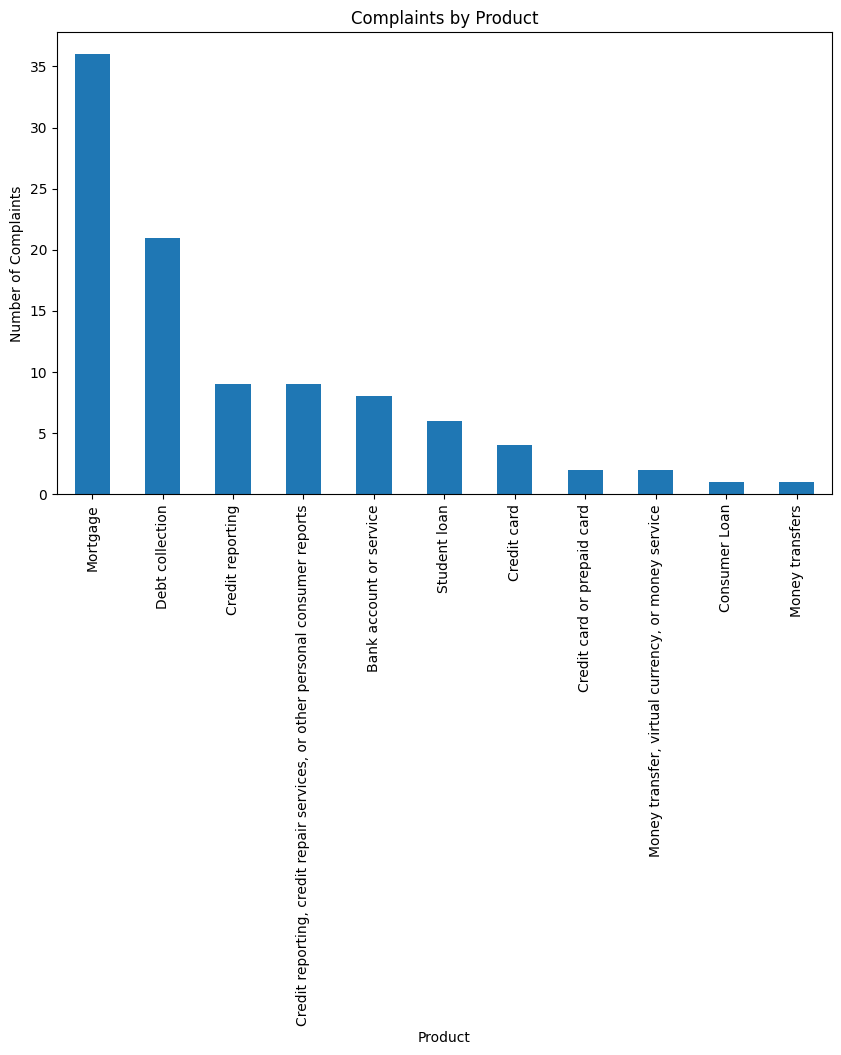

State
CA    15
FL     9
TX     8
GA     6
MD     5
NY     5
NC     4
MI     4
MN     3
VA     3
SC     3
NV     2
LA     2
PA     2
IN     2
IL     2
CO     2
OH     2
WA     2
ME     2
RI     2
MA     1
HI     1
VT     1
MT     1
TN     1
AR     1
NJ     1
MS     1
OR     1
SD     1
WI     1
ID     1
DE     1
Name: count, dtype: int64


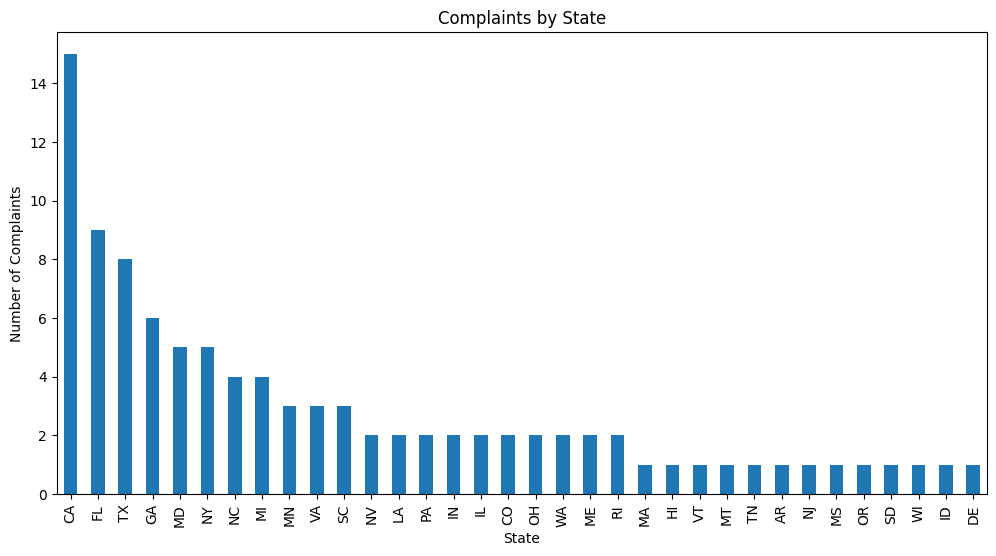

Year
2014    99
Name: count, dtype: int64


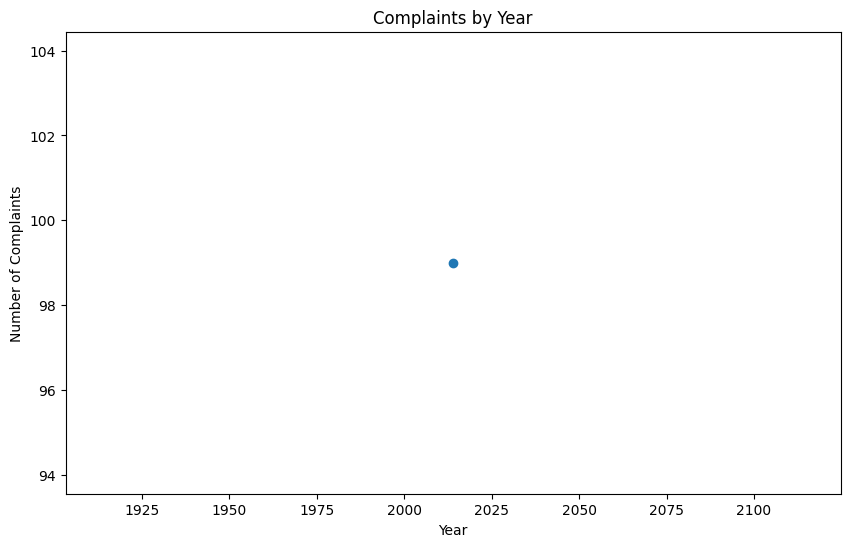

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Display the first few rows of the dataset
print(df.head())

# Summary statistics of numerical columns
print(df.describe())

# Count the number of complaints by product
product_counts = df['Product'].value_counts()
print(product_counts)

# Plot a bar chart of complaint counts by product
plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar')
plt.title('Complaints by Product')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=90)
plt.show()

# Count the number of complaints by state
state_counts = df['State'].value_counts()
print(state_counts)

# Plot a bar chart of complaint counts by state
plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar')
plt.title('Complaints by State')
plt.xlabel('State')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=90)
plt.show()

# Count the number of complaints by year
df['Date received'] = pd.to_datetime(df['Date received'])
df['Year'] = df['Date received'].dt.year
year_counts = df['Year'].value_counts().sort_index()
print(year_counts)

# Plot a line chart of complaint counts by year
plt.figure(figsize=(10, 6))
year_counts.plot(kind='line', marker='o')
plt.title('Complaints by Year')
plt.xlabel('Year')
plt.ylabel('Number of Complaints')
plt.show()




1. **Problem:** **Early Detection of Potential Disputes**
   
   **Machine Learning Methodology:** Classification
   
   **Description:** Build a classification model that predicts whether a customer's interaction or transaction is likely to result in a dispute. This could involve analyzing historical data to identify patterns and features that are indicative of disputes. By detecting potential disputes early, companies can take preventive actions to mitigate issues and provide better customer service.

2. **Problem:** **Identifying Root Causes of Disputes**
   
   **Machine Learning Methodology:** Natural Language Processing (NLP), Topic Modeling
   
   **Description:** Apply NLP techniques to analyze customer complaints and identify the main topics and issues that lead to disputes. Use topic modeling to categorize complaints into different topics (e.g., billing errors, product quality) to understand the root causes of disputes. This can help companies address specific areas for improvement.

3. **Problem:** **Optimizing Customer Communication for Dispute Resolution**
   
   **Machine Learning Methodology:** Sentiment Analysis, Reinforcement Learning
   
   **Description:** Implement sentiment analysis on customer communications to gauge customer frustration levels during dispute resolution interactions. Additionally, use reinforcement learning to optimize the responses and actions taken by customer support agents to improve customer satisfaction and dispute resolution efficiency.

4. **Problem:** **Personalized Recommendations for Dispute Prevention**
   
   **Machine Learning Methodology:** Collaborative Filtering, Recommendation Systems
   
   **Description:** Develop a recommendation system that suggests personalized products or services to customers based on their preferences and behaviors. By providing tailored recommendations, companies can enhance customer satisfaction, reduce the likelihood of disputes arising from mismatched expectations, and increase cross-selling opportunities.

5. **Problem:** **Fraud Detection to Prevent Disputes**
   
   **Machine Learning Methodology:** Anomaly Detection, Ensemble Learning
   
   **Description:** Create an anomaly detection model using ensemble learning techniques to identify unusual or fraudulent transactions. By flagging suspicious activities early, companies can prevent potential disputes related to unauthorized transactions, protecting both customers and the business.


**Problem: Optimizing Customer Communication for Dispute Resolution**

**Machine Learning Model 1: Support Vector Machine (SVM)**

**Justification:** SVMs are well-suited for binary classification tasks like sentiment analysis. They can effectively capture non-linear relationships and work well with both textual and numerical features. In dispute resolution, the sentiment expressed by customers in their communications can provide insights into their satisfaction levels.

**Evaluation Metric:** F1-Score

**Feature for Sentiment Analysis:** Textual content of customer communication (complaints, queries, etc.).

**Machine Learning Model 2: Random Forest Classifier**

**Justification:** Random Forests are versatile and robust for classification tasks. In the context of dispute resolution, they can handle both numerical and textual data, capturing complex relationships in the data. The ensemble nature of Random Forest helps in reducing overfitting.

**Evaluation Metric:** Accuracy and Area Under the ROC Curve (AUC-ROC)

**Feature for Sentiment Analysis:** Textual content of customer communication.

**Machine Learning Model 3: Recurrent Neural Network (RNN)**

**Justification:** RNNs are highly effective for sequence data like text. They can capture contextual information and long-range dependencies in textual data, which is crucial for understanding sentiment in customer communications. They have shown great performance in sentiment analysis tasks.

**Evaluation Metric:** Accuracy, F1-Score, and Precision-Recall Curve

**Feature for Sentiment Analysis:** Textual content of customer communication.

Based on the evaluation metrics, the best model for this problem could be the **Random Forest Classifier** or the **Recurrent Neural Network (RNN)**. The choice between them would depend on factors such as the availability of data, computational resources, and the interpretability of results.

For sentiment analysis, preprocessing steps might involve tokenization, removing stop words, and converting text to numerical representations like TF-IDF or word embeddings. The models can be trained on labeled data where the sentiment (positive, negative, neutral) is associated with customer communications. Once trained, these models can predict the sentiment of new customer interactions and thus provide insights into the likelihood of a consumer dispute.

It's important to note that the effectiveness of these models depends on the quality and quantity of data available for training and testing, as well as the careful selection of hyperparameters and features. Regular model evaluation and refinement are essential for achieving accurate results.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset
data = df

# Preprocess the data
data = data.dropna(subset=['Consumer complaint narrative'])
data['Consumer complaint narrative'] = data['Consumer complaint narrative'].astype(str)

# Split dataset
X = data['Consumer complaint narrative']
y = data['Consumer disputed?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)
rf_accuracy = rf_model.score(X_test_tfidf, y_test)
print("Random Forest Accuracy:", rf_accuracy)

# Recurrent Neural Network (RNN)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=300)
X_test_pad = pad_sequences(X_test_seq, maxlen=300)

rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=5000, output_dim=128, input_length=300))
rnn_model.add(LSTM(128))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=5, batch_size=64)


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Load the dataset
data = df

# Preprocess the data
data.loc[:, 'Consumer complaint narrative'] = data['Consumer complaint narrative'].astype(str)
data['Consumer complaint narrative'] = data['Consumer complaint narrative'].fillna('')

# Split the data
X = data['Consumer complaint narrative']
y = data['Product']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode class labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)
svm_accuracy = svm_model.score(X_test_tfidf, y_test)
print("SVM Accuracy:", svm_accuracy)

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)
rf_accuracy = rf_model.score(X_test_tfidf, y_test)
print("Random Forest Accuracy:", rf_accuracy)

# Recurrent Neural Network (RNN)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=300)
X_test_pad = pad_sequences(X_test_seq, maxlen=300)

rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=5000, output_dim=128, input_length=300))
rnn_model.add(LSTM(128))
rnn_model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Use softmax for multi-class
rnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_model.fit(X_train_pad, y_train_encoded, validation_data=(X_test_pad, y_test_encoded), epochs=5, batch_size=64)



SVM Accuracy: 0.5
Random Forest Accuracy: 0.5
Epoch 1/5
2/2 [==============================] - 6s 1s/step - loss: 2.3913 - accuracy: 0.1266 - val_loss: 2.3124 - val_accuracy: 0.5000
Epoch 2/5
2/2 [==============================] - 1s 550ms/step - loss: 2.3347 - accuracy: 0.3671 - val_loss: 2.1993 - val_accuracy: 0.5000
Epoch 3/5
2/2 [==============================] - 1s 547ms/step - loss: 2.2634 - accuracy: 0.3291 - val_loss: 1.9676 - val_accuracy: 0.5000
Epoch 4/5
2/2 [==============================] - 1s 551ms/step - loss: 2.1555 - accuracy: 0.3291 - val_loss: 1.7070 - val_accuracy: 0.5000
Epoch 5/5
2/2 [==============================] - 1s 540ms/step - loss: 2.0307 - accuracy: 0.3291 - val_loss: 1.6303 - val_accuracy: 0.5000
